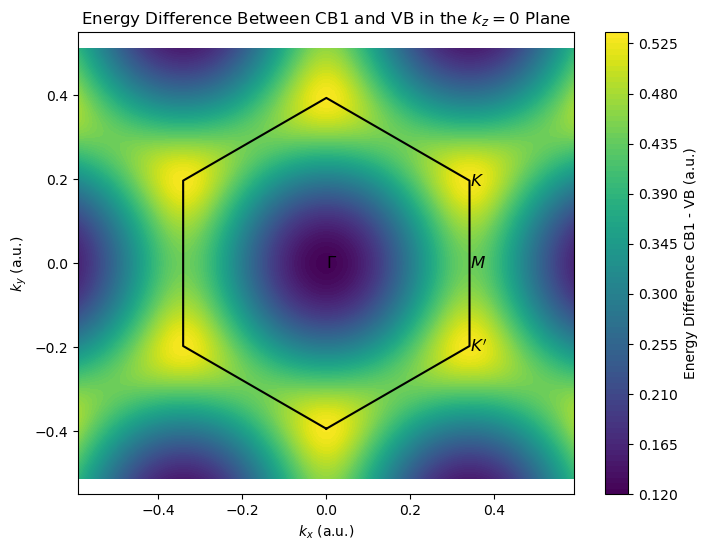

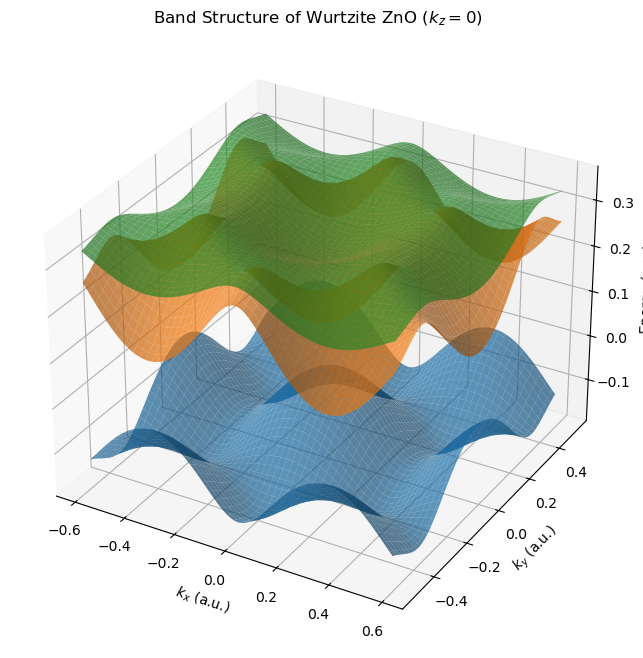

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the band structure parameters
band_parameters = {
    "VB": {"t": 2.38, "t'": -0.020, "u": 27.1, "p": -7.406, "q": 4.0, "alpha0_z": -0.0059, "alpha1_z": 0.0059},
    "CB1": {"t": -2.38, "t'": -0.020, "u": 27.1, "p": 10.670, "q": 3.3, "alpha0_z": -0.0435, "alpha1_z": 0.0435},
    "CB2": {"t": -1.00, "t'": -0.008, "u": 27.1, "p": 10.500, "q": 3.5, "alpha0_z": -0.0335, "alpha1_z": 0.0335},
}

# Define the lattice constants (in atomic units)
ax, ay, az = 5.32, 6.14, 9.83  # lattice constants for wurtzite ZnO

def hexagonal_energy(t, t_prime, u, p, q, kx, ky):
    """Calculate the hexagonal energy component (kx, ky)."""
    f = 2 * np.cos(np.sqrt(3) * ky * ay) + 4 * np.cos(np.sqrt(3) / 2 * ky * ay) * np.cos(np.sqrt(3) * kx * ax)
    return (t * np.sqrt(f + q) + t_prime * f + p) / u

def kz_energy(alpha0_z, alpha1_z, kz):
    """Calculate the z-direction energy component (kz)."""
    return alpha0_z + alpha1_z * np.cos(kz * az)

def E_m(kx, ky, kz, band):
    """Calculate the band energy E_m for a given kx, ky, kz and band."""
    params = band_parameters[band]
    Em_xy = hexagonal_energy(params["t"], params["t'"], params["u"], params["p"], params["q"], kx, ky)
    Em_z = kz_energy(params["alpha0_z"], params["alpha1_z"], kz)
    return Em_xy + Em_z

# Create a grid of kx and ky values
kx_values = np.linspace(-np.pi / ax, np.pi / ax, 100)
ky_values = np.linspace(-np.pi / ay, np.pi / ay, 100)
kx, ky = np.meshgrid(kx_values, ky_values)

# Compute the band energies at kz = 0
energies = {band: E_m(kx, ky, 0, band) for band in band_parameters}

# Compute the energy difference between CB1 and VB
energy_difference = energies["CB1"] - energies["VB"]

# Define the positions of the high symmetry points in the Brillouin zone
high_symmetry_points = {
    r"$\Gamma$": [0, 0],
    r"$K$": [np.pi / (ax * np.sqrt(3)), 2*np.pi / (3*np.sqrt(3) * ay)],
    r"$K'$": [np.pi / ( ax * np.sqrt(3)), -2*np.pi / (3*np.sqrt(3) * ay)],
    r"$M$": [np.pi / ( ax * np.sqrt(3)), 0]
}

# Define Brillouin zone vertices for the overlay
bz_vertices = np.array([
    [0, -4 * np.pi / (3*np.sqrt(3)*ay)],
    [np.pi / ( ax * np.sqrt(3)), -2*np.pi / (3*np.sqrt(3) * ay)],
    [np.pi / (ax * np.sqrt(3)), 2*np.pi / (3*np.sqrt(3) * ay)],
    [0, 4 * np.pi / (3*np.sqrt(3)*ay)],
    [-np.pi / (ax * np.sqrt(3)), 2*np.pi / (3*np.sqrt(3) * ay)],
    [-np.pi / (ax * np.sqrt(3)), -2*np.pi / (3*np.sqrt(3) * ay)],
    [0, -4 * np.pi / (3*np.sqrt(3)*ay)]
])

# Plot the energy difference as a heatmap
plt.figure(figsize=(8, 6))
plt.contourf(kx, ky, energy_difference, levels=100, cmap="viridis")
plt.colorbar(label="Energy Difference CB1 - VB (a.u.)")
plt.title("Energy Difference Between CB1 and VB in the $k_z = 0$ Plane")
plt.plot(bz_vertices[:, 0], bz_vertices[:, 1], color="black", linewidth=1.5, label="Brillouin Zone")

# Add the high symmetry points labels
for label, position in high_symmetry_points.items():
    plt.text(position[0], position[1], label, color='black', fontsize=12, ha='left', va='center')

plt.xlabel(r"$k_x$ (a.u.)")
plt.axis("equal")
plt.ylabel(r"$k_y$ (a.u.)")
plt.show()

# Plot the 3D band structure
fig = plt.figure(figsize=(12, 8))
axs = fig.add_subplot(111, projection='3d')

for band, energy in energies.items():
    axs.plot_surface(kx, ky, energy, label=band, alpha=0.7)

# Configure the 3D plot
axs.set_xlabel(r"$k_x$ (a.u.)")
axs.set_ylabel(r"$k_y$ (a.u.)")
axs.set_zlabel("Energy (a.u.)")
axs.set_title("Band Structure of Wurtzite ZnO ($k_z = 0$)")
#axs.legend(band_parameters.keys())

plt.show()
